<a href="https://colab.research.google.com/github/Paco279/lenguaje_claro_cyc_2/blob/main/volumetr%C3%ADa/lecturabilidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cálculo de lecturabilidad de un sitio web

Con este código vamos a bajarnos el texto de un sitio web y a calcular su lecturabilidad de acuerdo con la fórmula de Fernández Huerta.

In [1]:
!pip install textstat

In [2]:
#Importamos las librerías
import requests
from bs4 import BeautifulSoup
import pandas as pd
import textstat
import re

In [3]:
url = 'https://institucional.cadiz.es/' #indicamos la URL de la que queremos extraer textos

In [25]:
#Descargamos los textos y los guardamos en una tabla
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

# Extracting all the links from the page
links = []
for link in soup.find_all('a'):
    links.append(link.get('href'))

texts = []
for link in links:
    if link is not None:# and link.startswith("/"):
        full_url = url + link
        response = requests.get(full_url)
        soup = BeautifulSoup(response.content, 'html.parser')
        # Extracting all the text from the page
        text = soup.get_text()
        text = re.sub("(\s|\\n)+", " ", text)
        if text:
            texts.append(text)
        else:
            texts.append("")  # add empty string when no text is found

df = pd.DataFrame()
df['links'] = pd.Series(links)
df['texts'] = pd.Series(texts)

In [26]:
df.dropna() #eliminamos filas vacías

,links,texts
0,#main-content,Ayuntamiento de Cádiz | Pasar al contenido pr...
1,http://www.cadiz.es,Ayuntamiento de Cádiz | Pasar al contenido pr...
2,/,Ayuntamiento de Cádiz | Pasar al contenido pr...
3,/,Ayuntamiento de Cádiz | Pasar al contenido pr...
4,http://transparencia.cadiz.es,Ayuntamiento de Cádiz | Pasar al contenido pr...
...,...,...
181,/contacto,Ayuntamiento de Cádiz | Contacto Pasar al con...
182,/contactos-de-interés,Ayuntamiento de Cádiz | Contactos de Interés ...
183,/mapa-web,Ayuntamiento de Cádiz | Pasar al contenido pr...
184,https://transparencia.cadiz.es/derecho-de-acce...,Ayuntamiento de Cádiz | Pasar al contenido pr...


In [27]:
#Calculamos número de oraciones por página y lecturabilidad
df['num oraciones'] = df['texts'].astype(str).apply(lambda x: textstat.sentence_count(x) if x else 0)
df['num palabras'] = df['texts'].astype(str).apply(lambda x: textstat.lexicon_count(x, removepunct=True) if x else 0)
df['palabras/oración'] = df['num palabras'].divide(df['num oraciones'])
df['fdz huerta'] = df['texts'].astype(str).apply(lambda x: textstat.fernandez_huerta(x) if x else 0)
df['tiempo lectura'] = df['texts'].astype(str).apply(lambda x: textstat.reading_time(x, ms_per_char=14.69) if x else 0)
df.head()


,links,texts,num oraciones,num palabras,palabras/oración,fdz huerta,tiempo lectura
0,#main-content,Ayuntamiento de Cádiz | Pasar al contenido pr...,52,759,14.596154,59.95,85.91
1,http://www.cadiz.es,Ayuntamiento de Cádiz | Pasar al contenido pr...,52,759,14.596154,59.95,85.91
2,/,Ayuntamiento de Cádiz | Pasar al contenido pr...,52,759,14.596154,59.95,85.91
3,/,Ayuntamiento de Cádiz | Pasar al contenido pr...,52,759,14.596154,59.95,85.91
4,http://transparencia.cadiz.es,Ayuntamiento de Cádiz | Pasar al contenido pr...,52,759,14.596154,59.95,85.91


<Axes: >

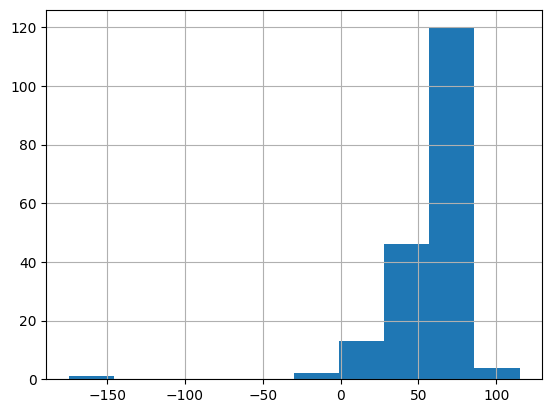

In [28]:
df['fdz huerta'].hist()

In [29]:
#Guardamos la tabla en un fichero csv
df.to_csv("cadiz.csv")

In [30]:
print ('media de oraciones por archivo:')
print (round (df['num oraciones'].mean(),0))
print ('media de nivel de lectura:')
print(round(df['fdz huerta'].mean(), 0))
print ('media de tiempo de lectura (segundos):')
print(round(df['tiempo lectura'].mean(), 0))



media de oraciones por archivo:
33.0
media de nivel de lectura:
54.0
media de tiempo de lectura (segundos):
64.0


<Axes: >

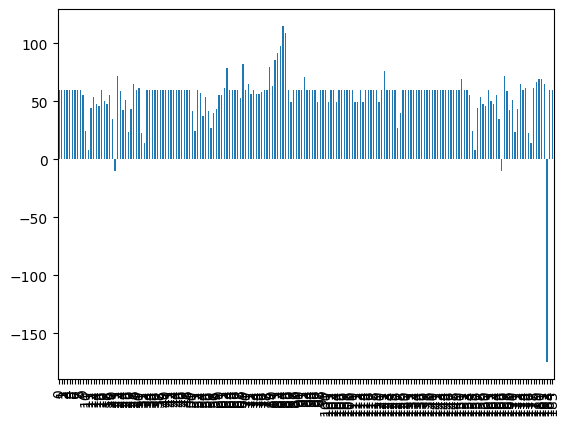

In [31]:
df['fdz huerta'].plot.bar()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a2326c74-8155-424a-a9ea-889ef1bb8e18' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>